In [1]:
from utils.configuration import get_config_from_json
from utils.training_utilities import set_GPU
from utils.plotting_traces import plot_traces
from seq2point.seq2point import SEQ2POINT
import builtins
import os
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import TensorDataset
import torch
from pprint import pprint

builtins.GENERAL_CONFIG = get_config_from_json(description="General Settings", config_file="configs/general_config.json")
builtins.MODEL_CONFIG = get_config_from_json(description="Model Parameters", config_file="configs/model_config.json")
builtins.TRAINING_CONFIG = get_config_from_json(description="Training Configuration", config_file="configs/training_config.json")
builtins.PLOT_CONFIG = get_config_from_json(description="Plot Settings", config_file="configs/plot_config.json")

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/refit/CLEAN_House2.csv') 

In [3]:
data.index = pd.to_datetime(data['Time'])
data.index.name = 'time'
df = data[['Aggregate', 'Appliance8']]
df = df.rename(columns= {'Appliance8':'Kettle'})

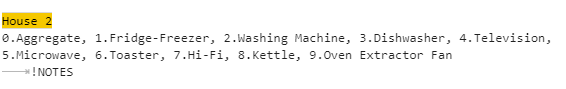

In [4]:
def resample(df, sampling_period='8s', fill_value=0.0, window=3.0):
    """

    """
    try:
        window_limit= int(window*60)
        appliance_data = df.copy()
#                     appliance_data = appliance_data.resample('1s').mean().dropna()
        appliance_data = appliance_data.resample('1s').asfreq()
        appliance_data.fillna(method='ffill', axis=0, inplace=True, limit=window_limit)
        appliance_data.fillna(axis=0, inplace=True, value=fill_value)
        appliance_data = appliance_data.resample(sampling_period).median()
        return appliance_data

    except Exception as e:
        print("Error occured in resample method due to ", e) 

In [5]:
resampled_df = resample(df, sampling_period='8s', fill_value=0.0, window=3.0)

<AxesSubplot:xlabel='time'>

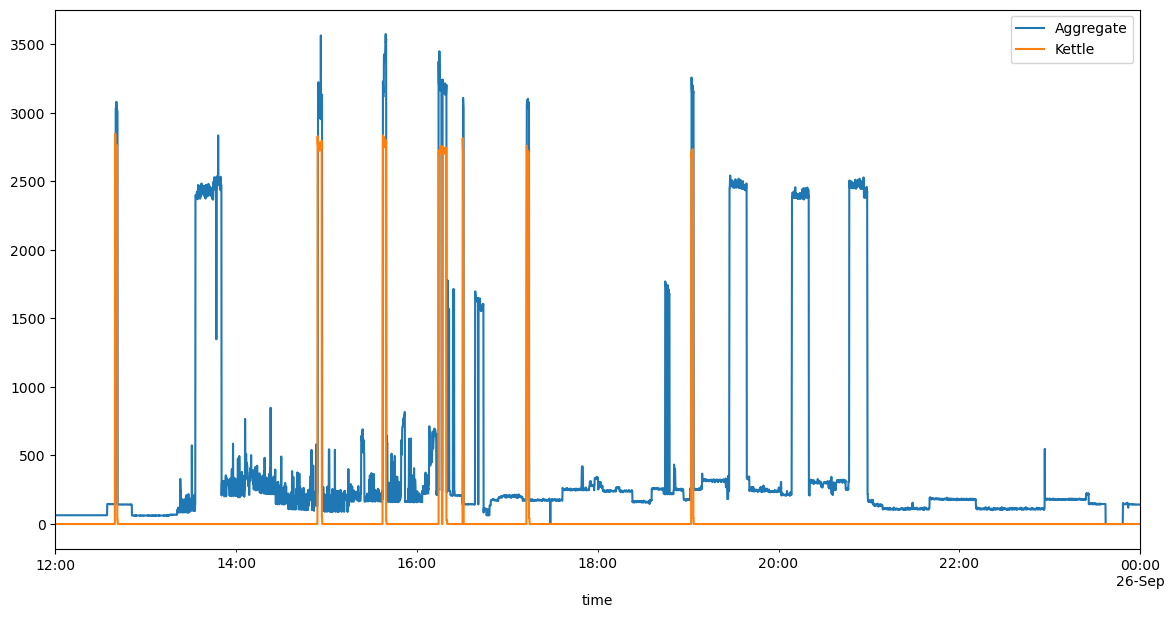

In [6]:
resampled_df['2013-09-25 12:00:00':'2013-09-26 00:00:00'].plot(figsize=(14,7))

In [7]:
resampled_df['Aggregate'].values

array([695., 694., 694., ..., 333., 313., 316.])

In [8]:
time = []
agg = []
app = []
for i in range(0, 5):
    time.append(resampled_df['Aggregate'].iloc[i:599].index)
    agg.append(list(resampled_df['Aggregate'].iloc[i:599].values))
    app.append(resampled_df['Kettle'].iloc[i:599].values)

In [9]:

def main():
    
    print(f"Followings are the {GENERAL_CONFIG['DESCRIPTION']} of your project..")
    pprint(GENERAL_CONFIG)
    
    
    ###### random seed selection in progress

    random_seed = 10
    train_loader = torch.randn(5,2)
    validation_loader = torch.randn(2,2)
        
    model = SEQ2POINT().to(set_GPU())

#     train_main,valid_main,train_appliance,valid_appliance = train_test_split(agg, app, test_size=.2, random_state = random_seed)

#     train_dataset = TensorDataset(torch.from_numpy(np.array(pd.Series(train_main))).float().permute(0,2,1), torch.from_numpy(np.array(pd.Series(train_main))).float().permute(0,2,1))
#     train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 512, shuffle = True, num_workers = 0, drop_last = True)

#     validation_dataset = TensorDataset(torch.from_numpy(valid_main).float().permute(0,2,1), torch.from_numpy(valid_appliance).float().permute(0,2,1))
#     validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 512, shuffle = True, num_workers = 0, drop_last = True)

    train_loss, validation_loss = model.run(train_loader, validation_loader)

    plot_traces(traces = [train_loss, validation_loss], labels=['training', 'validation'], axis_labels=['Epochs', 'Loss'], title='Training Loss vs Validation Loss per Epoch')


Followings are the General Settings of your project..
{'DATA_PATH': 'data/refit/',
 'DESCRIPTION': 'General Settings',
 'LOAD_MODEL': '',
 'PRE_TRAINED_MODEL_FLAG': False,
 'SAVE_PATH': 'models/'}

Initializing SEQ2POINT model archiecture

Followings are the Model Parameters of your network architecture..
{'CONV_KERNEL': [10, 8, 6, 5, 5],
 'CONV_LAYERS': 5,
 'CONV_PADDING': 0,
 'CONV_STRIDE': 1,
 'DESCRIPTION': 'Model Parameters',
 'INPUT_CHANNELS': [1, 30, 30, 40, 50],
 'LEFT_PAD': [4, 3, 2, 2, 2],
 'LINEAR_INPUT': [29950, 1024],
 'LINEAR_LAYERS': 2,
 'LINEAR_OUTPUT': [1024, 1],
 'OUTPUT_CHANNELS': [30, 30, 40, 50, 50],
 'POOL_KERNEL': [],
 'POOL_STRIDE': [],
 'RIGHT_PAD': [5, 4, 3, 2, 2],
 'SEQUENCE_LENGTH': 599}

SEQ2POINT model archiecture has been initialized

Followings are the Training Configuration of your experiment..
{'DESCRIPTION': 'Training Configuration',
 'EARLY_STOPPING_THRESHOLD': 3,
 'LEARNING_RATE': 0.001,
 'LOSS': 'nn.MSELoss',
 'LOSS_REDUCTION': 'mean',
 'NUM_EPOCHS

C:\Users\mahno\Anaconda\envs\torchy\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\mahno\Anaconda\envs\torchy\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


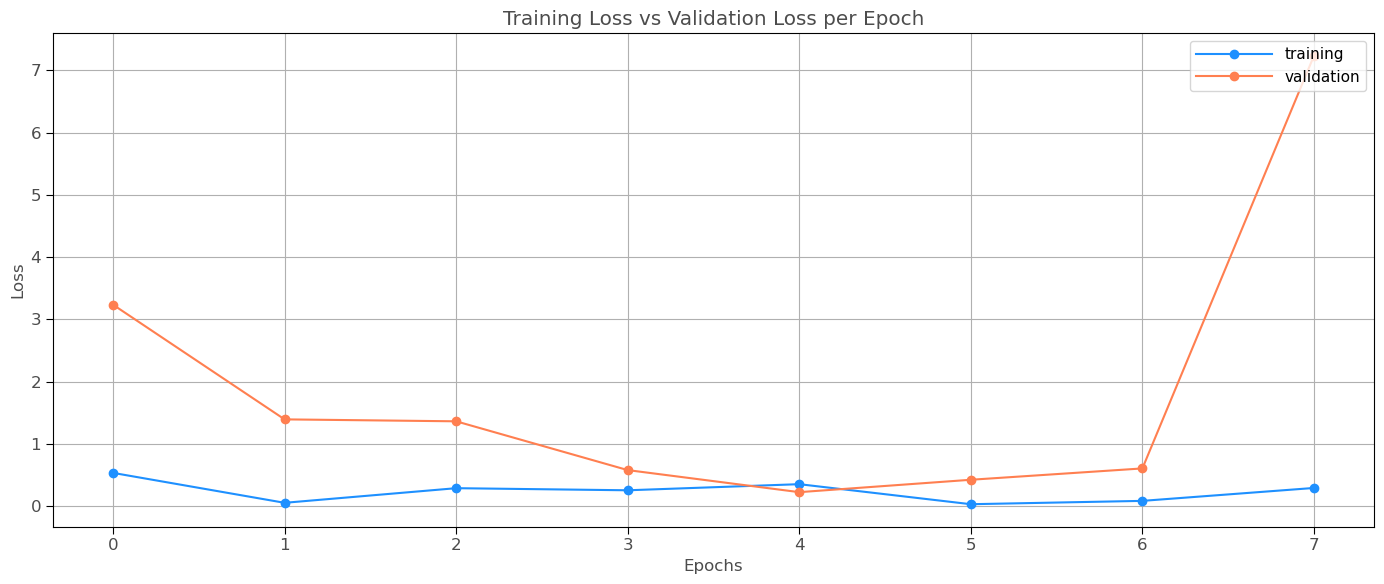

In [10]:

if __name__ == "__main__":
    main()
    

In [ ]:
#####implemented days 10
###vheck gpu issues  check model training check patterns??????
### debugging
####take 10 days data check 10 ##### runtime vs offline data
 +++++++
### mmd x y mmd as a loss convex loss range #####study!!!!





###target mae and mse evaluation metrics 


### during training save and load model
####experiment reload config architecre assumptions  hyperparameter tuning




#### quantify transerferability model is working in the ame way reproducable!!!!
### experiment design